___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project). You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [29]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
df = pd.read_csv("final_scout_dummy.csv")

In [8]:
df.head().T

,0,1,2,3,4
price,15770.0,14500.0,14640.0,14500.0,16790.0
km,56013.0,80000.0,83450.0,73000.0,16200.0
Gears,7.0,7.0,7.0,6.0,7.0
age,3.0,2.0,3.0,3.0,3.0
Previous_Owners,2.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...
Upholstery_type_Part/Full Leather,0.0,0.0,0.0,0.0,0.0
Gearing_Type_Manual,0.0,0.0,0.0,0.0,0.0
Gearing_Type_Semi-automatic,0.0,0.0,0.0,0.0,0.0
Drive_chain_front,1.0,1.0,1.0,1.0,1.0


In [50]:
X = df.drop("price", axis =1)
y = df["price"]

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=2)

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [53]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Robustscaler is used when outlier could be present

scaler = StandardScaler()

In [54]:
scaler.fit(X_train)

StandardScaler()

In [55]:
X_train_scaled = scaler.transform(X_train) 
X_train_scaled

array([[-0.59848747, -1.33196679, -0.34644911, ..., -0.17283359,
         0.11684922, -0.00947665],
       [-0.82381226,  1.49979766, -1.23972472, ..., -0.17283359,
         0.11684922, -0.00947665],
       [-0.86838543,  0.08391543, -1.23972472, ..., -0.17283359,
         0.11684922, -0.00947665],
       ...,
       [-0.4142237 ,  0.08391543, -0.34644911, ..., -0.17283359,
         0.11684922, -0.00947665],
       [-0.86814176, -1.33196679, -1.23972472, ..., -0.17283359,
         0.11684922, -0.00947665],
       [-0.86819591, -1.33196679, -1.23972472, ..., -0.17283359,
         0.11684922, -0.00947665]])

In [56]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.17635395, -1.33196679,  0.54682649, ..., -0.17283359,
         0.11684922, -0.00947665],
       [-0.82381226, -1.33196679, -1.23972472, ..., -0.17283359,
         0.11684922, -0.00947665],
       [-0.30064942, -1.33196679,  0.54682649, ..., -0.17283359,
         0.11684922, -0.00947665],
       ...,
       [-0.86814176,  0.08391543, -1.23972472, ..., -0.17283359,
         0.11684922, -0.00947665],
       [-0.82381226,  0.08391543, -1.23972472, ..., -0.17283359,
         0.11684922, -0.00947665],
       [-0.09456423,  1.49979766,  0.54682649, ..., -0.17283359,
         0.11684922, -0.00947665]])

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [57]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [58]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [59]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [61]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.889,0.893
mae,1706.582,1714.381
mse,6055898.162,5794204.675
rmse,2460.873,2407.115


In [62]:
from sklearn.model_selection import cross_validate

In [63]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [64]:
scores

{'fit_time': array([0.15620112, 0.11773658, 0.12487793, 0.11676598, 0.14194798]),
 'score_time': array([0.00266266, 0.00299978, 0.00216627, 0.00361609, 0.00400043]),
 'test_r2': array([-2.11669480e+22,  8.72678685e-01,  8.88833638e-01,  8.87900070e-01,
         8.88485941e-01]),
 'test_neg_mean_absolute_error': array([-2.27926962e+13, -1.78824331e+03, -1.75088423e+03, -1.73407284e+03,
        -1.67669384e+03]),
 'test_neg_mean_squared_error': array([-1.15707320e+30, -7.45496541e+06, -6.01676397e+06, -6.23136644e+06,
        -5.52449282e+06]),
 'test_neg_root_mean_squared_error': array([-1.07567337e+15, -2.73037825e+03, -2.45290929e+03, -2.49627051e+03,
        -2.35042397e+03])}

In [65]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                                    -4233389606357628354560.000
test_neg_mean_absolute_error                        -4558539239863.513
test_neg_mean_squared_error        -231414640540701944847431368704.000
test_neg_root_mean_squared_error                  -215134674353074.688
dtype: float64

In [66]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.156,0.003,-21166948031788142821376.000,-22792696192367.668,-1157073202703509653868412665856.000,-1075673371755343.625
2,0.118,0.003,0.873,-1788.243,-7454965.410,-2730.378
3,0.125,0.002,0.889,-1750.884,-6016763.967,-2452.909
4,0.117,0.004,0.888,-1734.073,-6231366.441,-2496.271
5,0.142,0.004,0.888,-1676.694,-5524492.819,-2350.424


In [67]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.889,0.893
mae,1706.582,1714.381
mse,6055898.162,5794204.675
rmse,2460.873,2407.115


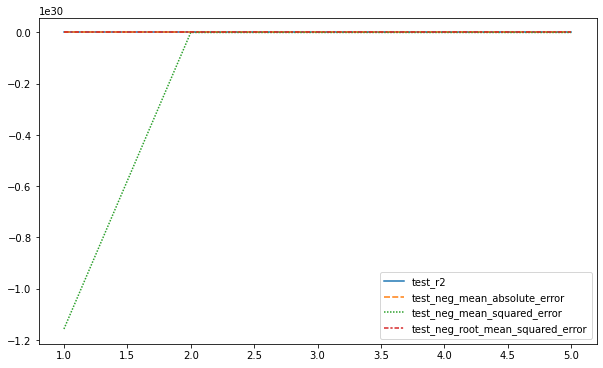

In [68]:
sns.lineplot(data = scores.iloc[:,2:]);

In [69]:
lm.coef_

array([-1.36429653e+03,  4.06600386e+02, -1.79342460e+03,  2.99631086e+01,
        2.53989868e+03, -8.55834713e+01, -1.72007758e+02, -2.23089658e+02,
        6.13508408e+02, -7.02827932e+02,  6.98966025e+01,  3.76549230e+01,
       -4.26296206e+00,  1.22977240e+02, -1.28326479e+01,  1.70242159e+02,
       -1.26506418e+01, -3.92159459e+01,  6.32691019e+01,  7.06607805e+01,
        1.02047085e+02,  4.42785479e+02,  1.15549534e+02,  5.66166783e+01,
        2.85424425e+01, -6.42896103e+01,  5.84726718e+01,  6.81844202e+01,
       -1.60147956e+02,  9.26463674e+01,  3.17141775e+01,  1.62732326e+02,
       -2.05054922e+01,  3.03336592e+02,  2.44500902e+01,  2.13449833e+02,
        1.02109226e+02, -2.79390875e+02,  5.35896104e+01, -9.40720403e+01,
        6.37978933e+01,  2.03476004e+02, -7.80472644e+01, -4.20442021e+01,
        1.27244437e+02, -4.37664800e+00, -3.85129985e+01,  9.15161028e+00,
       -2.17002085e+02,  4.53235183e+00,  2.50416377e+02,  4.97862940e+01,
        2.50530740e+01,  

In [70]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,-1364.297
1,406.600
2,-1793.425
3,29.963
4,2539.899
...,...
126,108.380
127,-660.643
128,424.725
129,-350.047


## 4. Implement Ridge Regression

In [71]:
from sklearn.linear_model import Ridge

In [72]:
ridge_model = Ridge(alpha=1, random_state=2)

In [73]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=2)

In [74]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [75]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.889,0.893
mae,1706.536,1714.310
mse,6055899.473,5793909.037
rmse,2460.874,2407.054


In [76]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.889,0.893,0.889,0.893
mae,1706.582,1714.381,1706.536,1714.310
mse,6055898.162,5794204.675,6055899.473,5793909.037
rmse,2460.873,2407.115,2460.874,2407.054


## For Ridge Regression CV with alpha : 1 

In [77]:
model = Ridge(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [78]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.031,0.005,0.886,-1718.812,-6229590.734,-2495.915
2,0.049,0.004,0.873,-1788.189,-7455305.314,-2730.440
3,0.042,0.005,0.889,-1750.805,-6016565.363,-2452.869
4,0.039,0.004,0.888,-1733.971,-6231141.999,-2496.226
5,0.036,0.005,0.889,-1675.436,-5518347.204,-2349.116


In [79]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                                   0.885
test_neg_mean_absolute_error          -1733.443
test_neg_mean_squared_error        -6290190.123
test_neg_root_mean_squared_error      -2504.913
dtype: float64

In [80]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.889,0.893
mae,1706.536,1714.310
mse,6055899.473,5793909.037
rmse,2460.874,2407.054


<AxesSubplot:>

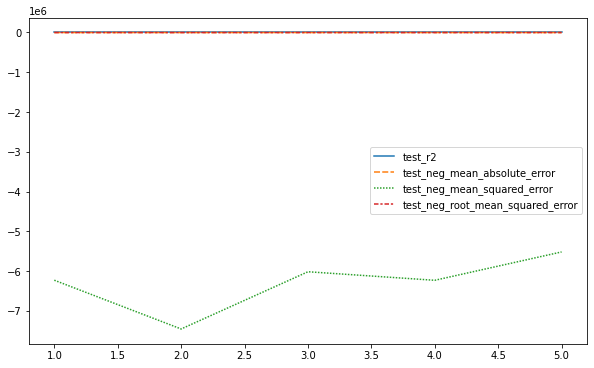

In [81]:
sns.lineplot(data = scores.iloc[:,2:])

In [84]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [85]:
ridge_model.coef_

array([-1.36422993e+03,  4.06890709e+02, -1.79330737e+03,  2.98474594e+01,
        2.53860950e+03, -8.56319740e+01, -1.71219912e+02, -2.22798594e+02,
        6.11228455e+02, -7.01003571e+02,  6.98906760e+01,  3.76738592e+01,
       -4.06805229e+00,  1.23155531e+02, -1.28613412e+01,  1.69980405e+02,
       -1.26457041e+01, -3.91557211e+01,  6.31730065e+01,  7.06165468e+01,
        1.02062086e+02,  4.42808301e+02,  1.15259798e+02,  5.64772035e+01,
        2.84935431e+01, -6.43031788e+01,  5.85176828e+01,  6.81835815e+01,
       -1.60087879e+02,  9.26596280e+01,  3.17490203e+01,  1.62706294e+02,
       -2.04639685e+01,  3.03353655e+02,  2.44038010e+01,  2.13436276e+02,
        1.02042193e+02, -2.79218862e+02,  5.35561990e+01, -9.39829907e+01,
        6.40595864e+01,  2.03513006e+02, -7.79712289e+01, -4.18617582e+01,
        1.27245166e+02, -4.41204023e+00, -3.84961736e+01,  9.13757034e+00,
       -2.16961847e+02,  4.57464554e+00,  2.50389183e+02,  4.97053438e+01,
        2.50598639e+01,  

In [86]:
pd.concat([lm_df,rm_df], axis = 1)

,lm_coef,ridge_coef_1
0,-1364.297,-1364.230
1,406.600,406.891
2,-1793.425,-1793.307
3,29.963,29.847
4,2539.899,2538.609
...,...,...
126,108.380,108.410
127,-660.643,-660.645
128,424.725,424.717
129,-350.047,-350.075


- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## Choosing best alpha value with Cross-Validation

In [93]:
from sklearn.linear_model import RidgeCV

In [94]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [95]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [99]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [100]:
ridge_cv_model.alpha_

1.0

In [101]:
ridge_cv_model.best_score_

-2504.913184140977

In [102]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [103]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.889,0.893
mae,1706.536,1714.310
mse,6055899.473,5793909.037
rmse,2460.874,2407.054


In [104]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.889,0.893,0.889,0.893,0.889,0.893
mae,1706.582,1714.381,1706.536,1714.310,1706.536,1714.310
mse,6055898.162,5794204.675,6055899.473,5793909.037,6055899.473,5793909.037
rmse,2460.873,2407.115,2460.874,2407.054,2460.874,2407.054


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [105]:
from sklearn.linear_model import Lasso, LassoCV

In [106]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [107]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [108]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.889,0.893
mae,1706.020,1713.023
mse,6056283.058,5785855.799
rmse,2460.952,2405.381


In [109]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.889,0.893,0.889,0.893,0.889,0.893,0.889,0.893
mae,1706.582,1714.381,1706.536,1714.310,1706.536,1714.310,1706.020,1713.023
mse,6055898.162,5794204.675,6055899.473,5793909.037,6055899.473,5793909.037,6056283.058,5785855.799
rmse,2460.873,2407.115,2460.874,2407.054,2460.874,2407.054,2460.952,2405.381


In [118]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["ridge_cv_coef_0.02"])

## For Lasso CV with Default Alpha : 1

In [111]:
model = Lasso(alpha=1, random_state=2)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [112]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.359,0.004,0.886,-1717.728,-6224241.617,-2494.843
2,0.417,0.003,0.873,-1787.325,-7457829.364,-2730.903
3,0.417,0.006,0.889,-1750.095,-6015186.768,-2452.588
4,0.487,0.004,0.888,-1733.041,-6228010.089,-2495.598
5,0.435,0.005,0.889,-1674.572,-5514290.244,-2348.253


In [113]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                                   0.885
test_neg_mean_absolute_error          -1732.552
test_neg_mean_squared_error        -6287911.616
test_neg_root_mean_squared_error      -2504.437
dtype: float64

<AxesSubplot:>

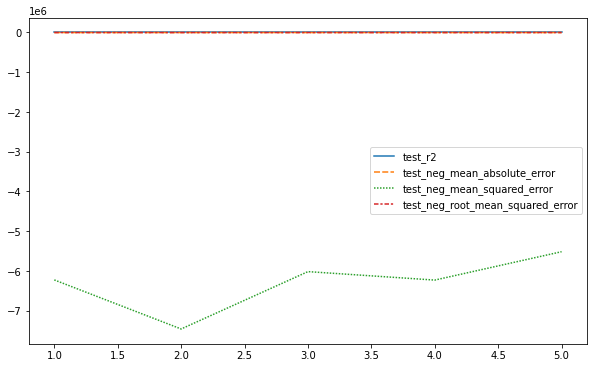

In [114]:
sns.lineplot(data = scores.iloc[:,2:])

In [115]:
lasso_model.coef_

array([-1.36281422e+03,  4.06418104e+02, -1.79523964e+03,  2.79130964e+01,
        2.53140074e+03, -8.46376404e+01, -1.58811665e+02, -2.16815135e+02,
        5.70858734e+02, -6.70504314e+02,  6.82538983e+01,  3.61320319e+01,
       -0.00000000e+00,  1.24452815e+02, -1.16735199e+01,  1.67249774e+02,
       -1.17858137e+01, -3.63756485e+01,  6.19543906e+01,  6.90345677e+01,
        1.01869236e+02,  4.42610365e+02,  1.13588367e+02,  5.49643554e+01,
        2.63367920e+01, -6.33083099e+01,  5.74183488e+01,  6.45436609e+01,
       -1.58298001e+02,  9.14785581e+01,  2.94076995e+01,  1.61788610e+02,
       -1.78255686e+01,  2.99614258e+02,  2.21762843e+01,  2.13035450e+02,
        9.93136630e+01, -2.71610826e+02,  5.17523068e+01, -8.94708258e+01,
        6.36587480e+01,  2.03493882e+02, -7.54797634e+01, -3.93526106e+01,
        1.25481522e+02, -3.71605573e+00, -3.66538686e+01,  8.27924154e+00,
       -2.15019700e+02,  3.36550286e+00,  2.49970081e+02,  4.61182110e+01,
        2.39961424e+01,  

In [116]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [119]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1
0,-1364.297,-1364.230,-1364.230,-1362.814
1,406.600,406.891,406.891,406.418
2,-1793.425,-1793.307,-1793.307,-1795.240
3,29.963,29.847,29.847,27.913
4,2539.899,2538.609,2538.609,2531.401
...,...,...,...,...
126,108.380,108.410,108.410,108.292
127,-660.643,-660.645,-660.645,-662.256
128,424.725,424.717,424.717,423.653
129,-350.047,-350.075,-350.075,-349.324


### Choosing best alpha value with Cross-Validation

In [120]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=2) 

In [121]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=2)

In [122]:
lasso_cv_model.alpha_

1.0

In [123]:
np.where(alpha_space[::-1]==lasso_cv_model.alpha_)

(array([0], dtype=int64),)

In [124]:
alpha_space[::-1]

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])

In [125]:
lasso_cv_model.mse_path_[99].mean()

6290228.419324695

In [126]:
y_pred = lasso_cv_model.predict(X_test_scaled)  
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [127]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.889,0.893
mae,1706.020,1713.023
mse,6056283.058,5785855.799
rmse,2460.952,2405.381


In [128]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.889,0.893,0.889,0.893,0.889,0.893,0.889,0.893,0.889,0.893
mae,1706.582,1714.381,1706.536,1714.310,1706.536,1714.310,1706.020,1713.023,1706.020,1713.023
mse,6055898.162,5794204.675,6055899.473,5793909.037,6055899.473,5793909.037,6056283.058,5785855.799,6056283.058,5785855.799
rmse,2460.873,2407.115,2460.874,2407.054,2460.874,2407.054,2460.952,2405.381,2460.952,2405.381


In [129]:
lasso_cv_model.coef_

array([-1.36281422e+03,  4.06418104e+02, -1.79523964e+03,  2.79130964e+01,
        2.53140074e+03, -8.46376404e+01, -1.58811665e+02, -2.16815135e+02,
        5.70858734e+02, -6.70504314e+02,  6.82538983e+01,  3.61320319e+01,
       -0.00000000e+00,  1.24452815e+02, -1.16735199e+01,  1.67249774e+02,
       -1.17858137e+01, -3.63756485e+01,  6.19543906e+01,  6.90345677e+01,
        1.01869236e+02,  4.42610365e+02,  1.13588367e+02,  5.49643554e+01,
        2.63367920e+01, -6.33083099e+01,  5.74183488e+01,  6.45436609e+01,
       -1.58298001e+02,  9.14785581e+01,  2.94076995e+01,  1.61788610e+02,
       -1.78255686e+01,  2.99614258e+02,  2.21762843e+01,  2.13035450e+02,
        9.93136630e+01, -2.71610826e+02,  5.17523068e+01, -8.94708258e+01,
        6.36587480e+01,  2.03493882e+02, -7.54797634e+01, -3.93526106e+01,
        1.25481522e+02, -3.71605573e+00, -3.66538686e+01,  8.27924154e+00,
       -2.15019700e+02,  3.36550286e+00,  2.49970081e+02,  4.61182110e+01,
        2.39961424e+01,  

In [130]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [131]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01
0,-1364.297,-1364.230,-1364.230,-1362.814,-1362.814
1,406.600,406.891,406.891,406.418,406.418
2,-1793.425,-1793.307,-1793.307,-1795.240,-1795.240
3,29.963,29.847,29.847,27.913,27.913
4,2539.899,2538.609,2538.609,2531.401,2531.401
...,...,...,...,...,...
126,108.380,108.410,108.410,108.292,108.292
127,-660.643,-660.645,-660.645,-662.256,-662.256
128,424.725,424.717,424.717,423.653,423.653
129,-350.047,-350.075,-350.075,-349.324,-349.324


## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [132]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [134]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=2)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=2)

In [135]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [136]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.850,0.859
mae,1934.866,1941.811
mse,8177121.701,7624870.831
rmse,2859.567,2761.317


In [137]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.889,0.893,0.889,0.893,0.889,0.893,0.889,0.893,0.889,0.893,0.850,0.859
mae,1706.582,1714.381,1706.536,1714.310,1706.536,1714.310,1706.020,1713.023,1706.020,1713.023,1934.866,1941.811
mse,6055898.162,5794204.675,6055899.473,5793909.037,6055899.473,5793909.037,6056283.058,5785855.799,6056283.058,5785855.799,8177121.701,7624870.831
rmse,2460.873,2407.115,2460.874,2407.054,2460.874,2407.054,2460.952,2405.381,2460.952,2405.381,2859.567,2761.317


## For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [138]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [139]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.849,-1947.250,-8240009.437,-2870.542
2,0.831,-1992.864,-9920703.024,-3149.715
3,0.857,-1925.793,-7756204.472,-2784.996
4,0.848,-1971.672,-8425036.688,-2902.591
5,0.850,-1917.787,-7437491.198,-2727.176


In [140]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                   0.847
test_neg_mean_absolute_error          -1951.073
test_neg_mean_squared_error        -8355888.964
test_neg_root_mean_squared_error      -2887.004
dtype: float64

In [141]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.850,0.859
mae,1934.866,1941.811
mse,8177121.701,7624870.831
rmse,2859.567,2761.317


In [142]:
elastic_model.coef_

array([-1055.21041867,   685.54703588, -1153.29980231,  -149.78087302,
        1152.76236461,   -99.59570036,   158.72710131,   338.5006964 ,
         190.16122704,    61.33305136,    44.09341316,    49.87967986,
         222.43108687,   298.30882961,   -37.49642478,     3.4571606 ,
         -18.11355109,    68.18012367,   -67.14122618,    85.60251079,
          64.97284897,   383.3951575 ,   -90.03785787,   -76.38680813,
          30.58297781,   -60.25205115,    82.84239721,   107.06509255,
         -70.62339825,   140.48111779,    25.04631954,   148.56918098,
          89.51774963,   273.68356727,    23.91085532,   169.73221702,
          65.955728  ,     6.42320799,   -20.20899765,    97.23287   ,
         196.00334573,   190.98374453,   -10.14713862,   180.79922289,
         105.52940961,   -42.11121395,   -21.11665451,   -10.91760435,
        -115.41742848,   -25.88291934,   172.90436466,     1.31066733,
         -22.037872  ,  -172.63617822,    56.49403906,   -19.46261547,
      

In [143]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [144]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)"
0,-1364.297,-1364.230,-1364.230,-1362.814,-1362.814,-1055.210
1,406.600,406.891,406.891,406.418,406.418,685.547
2,-1793.425,-1793.307,-1793.307,-1795.240,-1795.240,-1153.300
3,29.963,29.847,29.847,27.913,27.913,-149.781
4,2539.899,2538.609,2538.609,2531.401,2531.401,1152.762
...,...,...,...,...,...,...
126,108.380,108.410,108.410,108.292,108.292,218.265
127,-660.643,-660.645,-660.645,-662.256,-662.256,-515.753
128,424.725,424.717,424.717,423.653,423.653,327.437
129,-350.047,-350.075,-350.075,-349.324,-349.324,-251.380


### Choosing best alpha and l1_ratio values with Cross-Validation

In [145]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=2)

In [146]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=2)

In [147]:
elastic_cv_model.alpha_

1.0

In [148]:
elastic_cv_model.l1_ratio_

1.0

In [149]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [150]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.889,0.893
mae,1706.020,1713.023
mse,6056283.058,5785855.799
rmse,2460.952,2405.381


In [151]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.889,0.893,0.889,0.893,0.889,0.893,0.889,0.893,0.889,0.893,0.850,0.859,0.889,0.893
mae,1706.582,1714.381,1706.536,1714.310,1706.536,1714.310,1706.020,1713.023,1706.020,1713.023,1934.866,1941.811,1706.020,1713.023
mse,6055898.162,5794204.675,6055899.473,5793909.037,6055899.473,5793909.037,6056283.058,5785855.799,6056283.058,5785855.799,8177121.701,7624870.831,6056283.058,5785855.799
rmse,2460.873,2407.115,2460.874,2407.054,2460.874,2407.054,2460.952,2405.381,2460.952,2405.381,2859.567,2761.317,2460.952,2405.381


In [152]:
elastic_cv_model.coef_

array([-1.36281422e+03,  4.06418104e+02, -1.79523964e+03,  2.79130964e+01,
        2.53140074e+03, -8.46376404e+01, -1.58811665e+02, -2.16815135e+02,
        5.70858734e+02, -6.70504314e+02,  6.82538983e+01,  3.61320319e+01,
       -0.00000000e+00,  1.24452815e+02, -1.16735199e+01,  1.67249774e+02,
       -1.17858137e+01, -3.63756485e+01,  6.19543906e+01,  6.90345677e+01,
        1.01869236e+02,  4.42610365e+02,  1.13588367e+02,  5.49643554e+01,
        2.63367920e+01, -6.33083099e+01,  5.74183488e+01,  6.45436609e+01,
       -1.58298001e+02,  9.14785581e+01,  2.94076995e+01,  1.61788610e+02,
       -1.78255686e+01,  2.99614258e+02,  2.21762843e+01,  2.13035450e+02,
        9.93136630e+01, -2.71610826e+02,  5.17523068e+01, -8.94708258e+01,
        6.36587480e+01,  2.03493882e+02, -7.54797634e+01, -3.93526106e+01,
        1.25481522e+02, -3.71605573e+00, -3.66538686e+01,  8.27924154e+00,
       -2.15019700e+02,  3.36550286e+00,  2.49970081e+02,  4.61182110e+01,
        2.39961424e+01,  

In [153]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:1)"])

In [154]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, ecm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)","elastic_coef_(alp:0.01, l1:1)"
0,-1364.297,-1364.230,-1364.230,-1362.814,-1362.814,-1055.210,-1362.814
1,406.600,406.891,406.891,406.418,406.418,685.547,406.418
2,-1793.425,-1793.307,-1793.307,-1795.240,-1795.240,-1153.300,-1795.240
3,29.963,29.847,29.847,27.913,27.913,-149.781,27.913
4,2539.899,2538.609,2538.609,2531.401,2531.401,1152.762,2531.401
...,...,...,...,...,...,...,...
126,108.380,108.410,108.410,108.292,108.292,218.265,108.292
127,-660.643,-660.645,-660.645,-662.256,-662.256,-515.753,-662.256
128,424.725,424.717,424.717,423.653,423.653,327.437,423.653
129,-350.047,-350.075,-350.075,-349.324,-349.324,-251.380,-349.324


## 7. Visually Compare Models Performance In a Graph

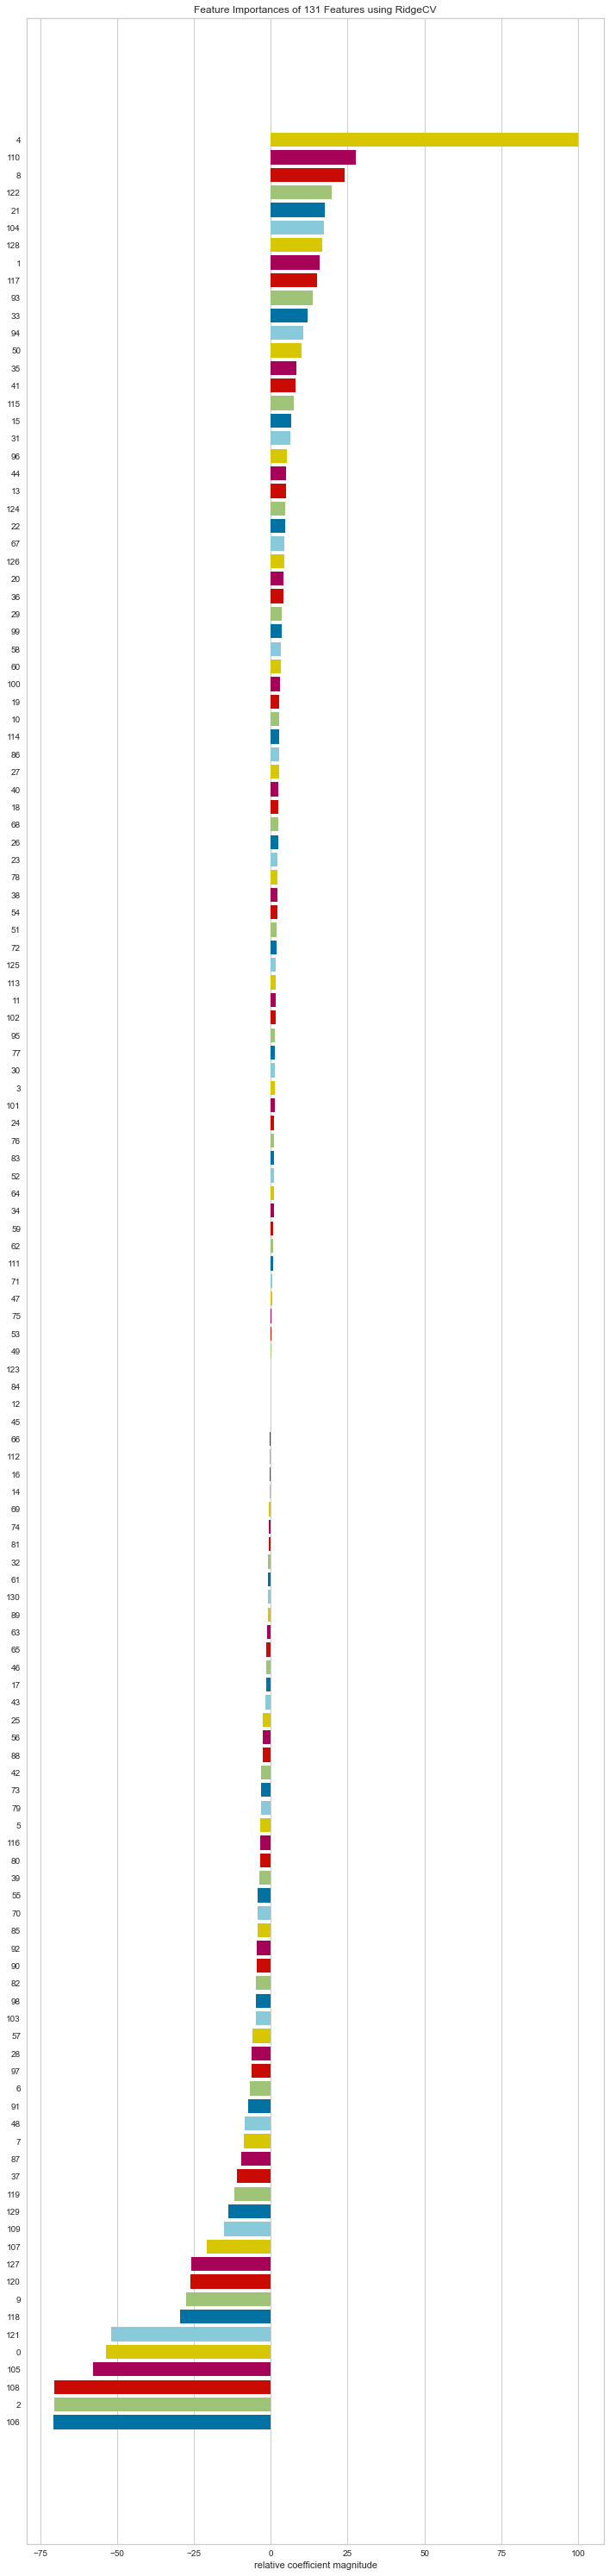

<AxesSubplot:title={'center':'Feature Importances of 131 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [155]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

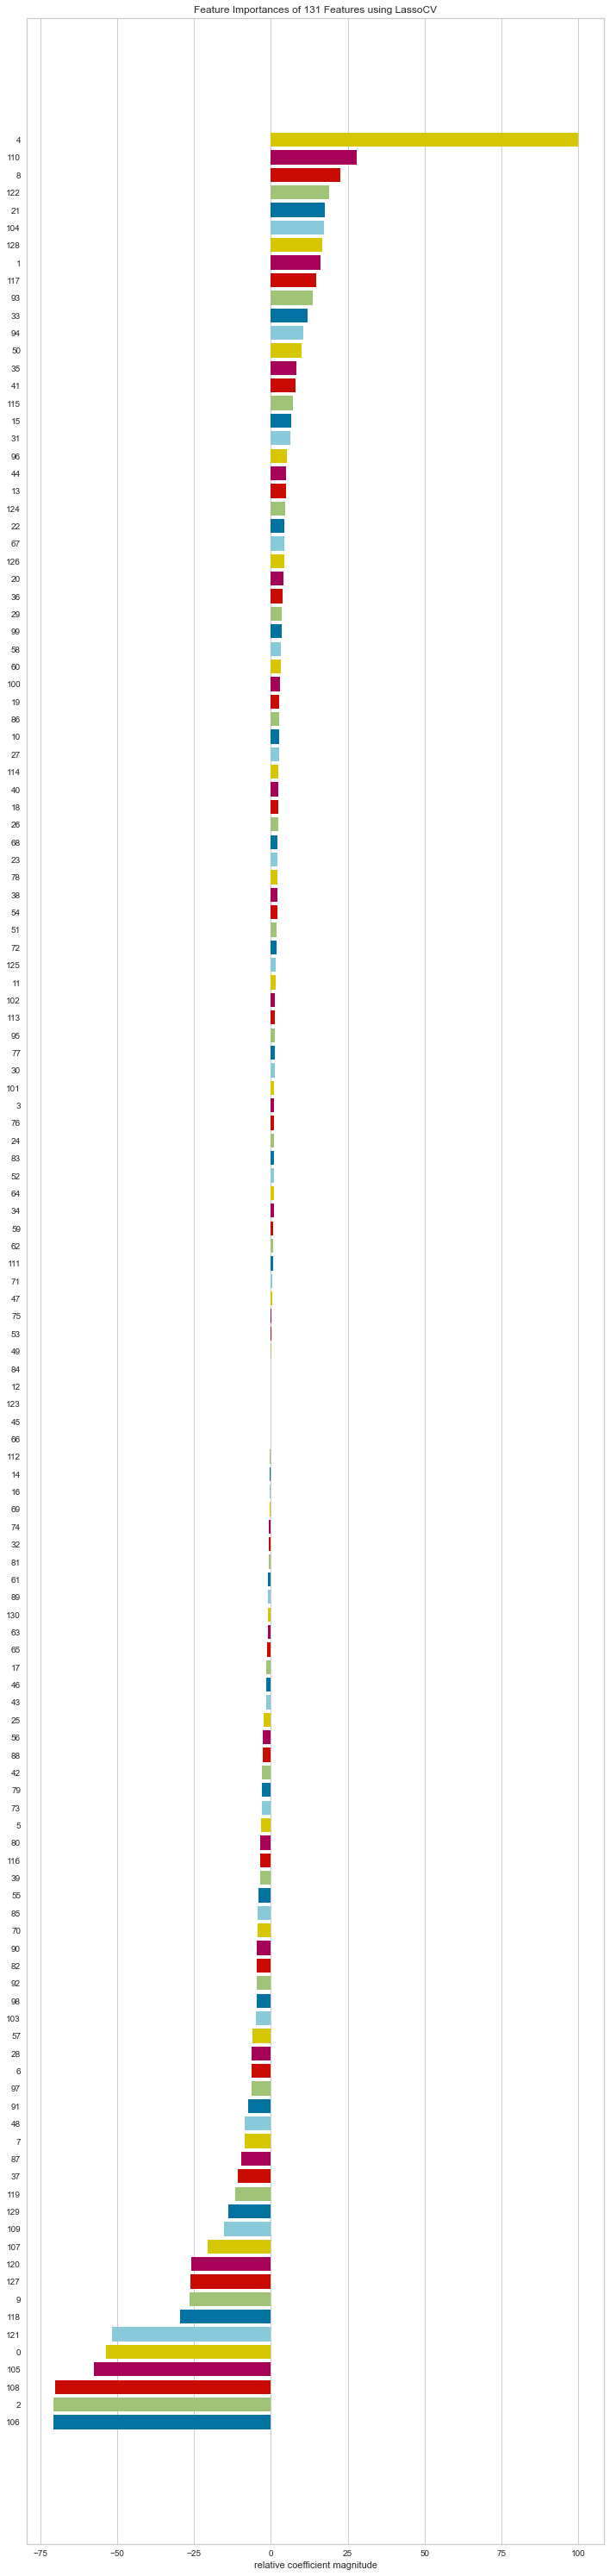

<AxesSubplot:title={'center':'Feature Importances of 131 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [156]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___